In [10]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import os

import cv2
from matplotlib import pyplot as plt
import numpy as np

In [11]:
h, w = 5, 5
size = (h, w)

In [12]:
image1 = np.zeros(size, dtype=np.int8)
image2 = np.zeros(size, dtype=np.int8)

image1[1::2, 1:4:2] = 1
image1[2, 2] = 1
for i in range(w):
    image2[i, i] = 1
    image2[w-i-1, i] = 1

image1 = image2.copy()
image1[0::4, 0::4] = 0
image1[0, 4] = 1

In [1144]:
li = []
# nums = [3, 2, 7, 9, 9, 0, 3, 3, 2, 9, 9, 1, 1]
# nums.reverse()
nums = [9, 9, 1, 1]

In [1199]:
sample_image1 = toGrey(load_image('dump/old_test/1.jpg'))

# sample_image2 = toGrey(load_image('dump/old_test/img_213.jpg'))
# sample_image2 = toGrey(load_image('dump/old_test/x.jpg'))
# sample_image2 = toGrey(load_image('dump/img_12.jpg'))
# sample_image2 = toGrey(load_image('dump/img_3.jpg'))
# sample_image2 = toGrey(load_image('dump/old_test/img_202.jpg'))
# sample_image2 = toGrey(load_image('dump/old_test/img_231.jpg'))
# sample_image2 = toGrey(load_image('dump/old_test/img_215.jpg'))
# sample_image2 = toGrey(load_image('dump/old_test/img_5.jpg'))
# sample_image2 = toGrey(load_image('dump/old_test/img_225.jpg'))
sample_image2 = toGrey(load_image('dump/old_test/9.jpg'))
sample_image2 = toGrey(load_image('dump/old_test/img_204.jpg'))
sample_image2 = toGrey(load_image('dump/old_test/img_229.jpg'))
sample_image2 = toGrey(load_image('dump/old_test/img_217.jpg'))

In [ ]:
plt.imshow(sample_image1.astype(np.uint8), cmap='gray', vmin=0)

In [ ]:
plt.imshow(sample_image2.astype(np.uint8), cmap='gray', vmin=0)

In [1202]:
def segment(y):
    y_unique = np.unique(y)

    cls, cx = [], 0
    last_b = -1
    for i in y_unique:
        m = abs(i - y_unique).flatten()
        m = m.mean() - m.std()/2

        a = i - m;a = 0 if a < 0 else a
        b = i + m;b = 255 if b > 255 else b

        img = ((y >= a) & (y <= b)).astype(np.int8)

        display = False
        if len(cls) == 0:
            cls = np.array([img], dtype=np.int8)
            last_a, last_b = a, b
            display = True

        else:
            if abs(a - last_a) > .25*y_unique.std() and (not is_row_in_array(img, cls)):
                cls = np.concatenate((cls, [img]))
                last_a, last_b = a, b
                display = True

        if display:
            imgx = img.copy()
            cx+=1

            fig=plt.figure(figsize=(10, 10))
            w, h, rows, columns = 10, 10, 1, 3

            ret, labels = cv2.connectedComponents(img)
    #         labeled_img = imshow_components(labels)

            li = [0, img, y]#, labeled_img]

            print(f'n_classes = {len(cls)}, ret = {ret}')
            for k in range(1, columns*rows):
                ax = fig.add_subplot(rows, columns, k)
                ax.set_title('{}: ({:.2f}-{:.2f}) +/- {:.2f}'.format(np.amax(labels), a, b, m))

                if k == 2:
                    img1 = li[k]
                    plt.imshow(li[k], cmap='gray', vmax=255)

                if k == 1:
                    img1 = np.zeros(tuple(list(img.shape)+[3]))
                    for i in range(3):
                        img1[:,:,i] = 255*img
                    plt.imshow(li[k], cmap='gray', vmin=0)

                    cv2.imwrite('dump/{}-{}.png'.format(len(cls), k), img1)
            plt.show()


        if cx == -1:
            break
            
    label = 1
    pos = np.where(labels == label)
    ar1, ar2 = pos

    x1, x2 = min(ar1), max(ar1)+1
    y1, y2 = min(ar2), max(ar2)+1
    return labels[x1:x2, y1:y2]


n_classes = 1, ret = 2


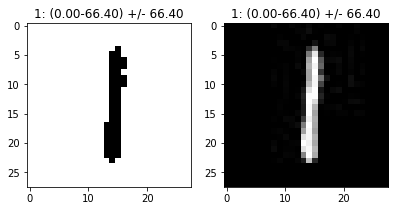

n_classes = 2, ret = 7


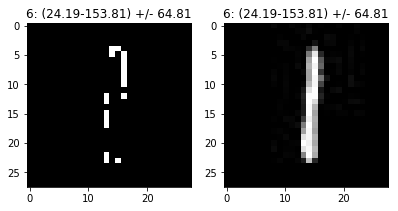

n_classes = 3, ret = 7


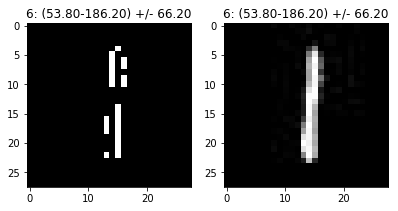

n_classes = 4, ret = 6


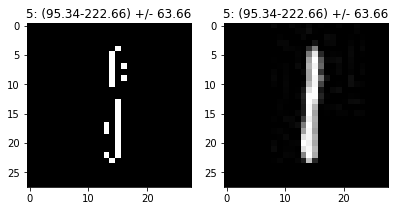

n_classes = 5, ret = 2


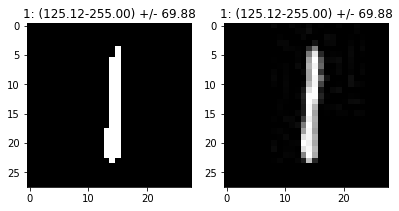

n_classes = 6, ret = 2


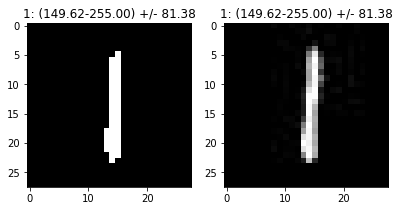

In [1203]:
image1 = segment(sample_image1)

n_classes = 1, ret = 2


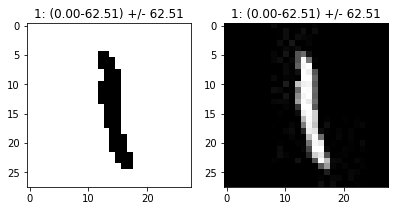

n_classes = 2, ret = 10


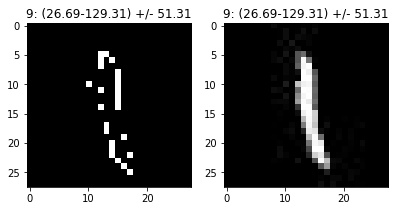

n_classes = 3, ret = 9


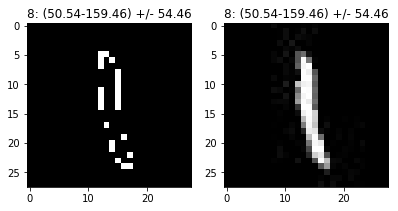

n_classes = 4, ret = 10


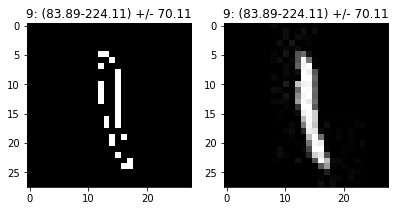

n_classes = 5, ret = 2


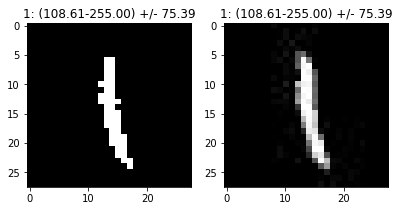

n_classes = 6, ret = 2


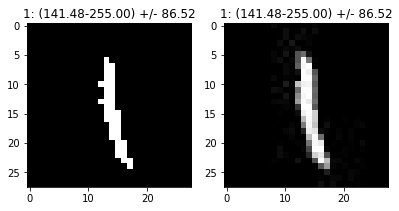

In [1204]:
image2 = segment(sample_image2)

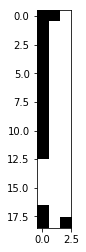

In [1205]:
plt.imshow(image1, cmap='gray', vmin=0, vmax=1)

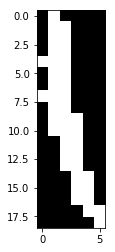

In [1206]:
plt.imshow(image2, cmap='gray', vmin=0, vmax=1)

In [13]:
def image2coord(image, w):
    img = np.array(np.where(image==1))
    return img

def centralize(img):
    res = []
    for row in img:
        res.append(row - row.mean())
    return np.array(res, dtype=np.float16)

In [15]:
img1 = image2coord(image1, h)
img2 = image2coord(image2, h)

print(img1)
print(img2)

[[0 1 1 2 3 3]
 [4 1 3 2 1 3]]
[[0 0 1 1 2 3 3 4 4]
 [0 4 1 3 2 1 3 0 4]]


In [16]:
centroid1 = img1.mean(1)
centroid2 = img2.mean(1)

print(centroid1)
print(centroid2)

[1.66666667 2.33333333]
[2. 2.]


In [113]:
central1 = centralize(img1)
central2 = centralize(img2)

print(central1)
print(central2)
img1 - centroid1

[[-1.667  -0.6665 -0.6665  0.3333  1.333   1.333 ]
 [ 1.667  -1.333   0.6665 -0.3333 -1.333   0.6665]]
[[-2. -2. -1. -1.  0.  1.  1.  2.  2.]
 [-2.  2. -1.  1.  0. -1.  1. -2.  2.]]


ValueError: operands could not be broadcast together with shapes (2,6) (2,) 

In [1211]:
# ratio = np.reshape((np.array(image1.shape) - 1) / (np.array(image2.shape) - 1), (2, 1))
# if img2.size < img1.size:
#     central1, central2 = central2, central1
#     ratio = np.reshape((np.array(image2.shape) - 1) / (np.array(image1.shape) - 1), (2, 1))

# a = central1.mean(0)
# b = (ratio * central2).mean(0)

# # print(central1)
# # print(central2)
# ratio

In [1212]:
a, b = central1.mean(0), central2.mean(0)

In [1213]:
a_values = b_values = delta = 0
count = 0
a_max_dev = 0

az_temp = list(a)
deltas = []

while len(az_temp):
    track_index = 0
    az = np.array(az_temp)
    
    for value_index, value in enumerate(az):
        dev = abs(b[track_index:] - value)
        if not len(dev):
            break

        if dev.mean() > a_max_dev:
            a_max_dev = dev.mean()
        
        az_temp.remove(value)
        deltas.append(dev[dev.argmin()])
        track_index += dev.argmin() + 1

error = np.array(deltas).mean()

sim = (1 - error)
print(error, sim)

# factor = (len(a) + len(b)) / (len(b) * len(a))
factor = 1 / np.array(range(len(deltas)+1, 0, -1))

li.append([float(f'{x:.5f}') for x in (np.array(deltas).sum(), error, (error * factor).mean(), sim)])

1.264 -0.263671875


In [1214]:
for ind in range(len(li)):
    print(nums[ind], li[ind])

9 [30.79688, 0.76953, 0.08076, 0.23047]
9 [60.625, 1.51562, 0.15906, -0.51562]
1 [37.03125, 0.92578, 0.09716, 0.07422]
1 [50.53125, 1.26367, 0.13262, -0.26367]


In [1215]:
trust = lambda x: x/(x+1)
for ind, lix in enumerate(li):
    n = lix[0]/lix[1]
    print(nums[ind], lix[1]*trust(n), lix[2]*trust(n))

9 0.750770298757445 0.0787912223404562
9 1.478653777513002 0.15518050029111394
1 0.9032000297441608 0.09479024702406906
1 1.23283952726445 0.12938439474373162


In [84]:
A = np.array(
    [
        [-2, 2],
        [-1, -2],
        [0, 3],
        [2, 0]
    ], dtype=np.float64
)

B = np.array(
    [
        [1, 3],
        [-4, 7],
        [1, -2],
        [-1, 0]
    ], dtype=np.float64
)

In [85]:
A, abs(A).sum(0)

(array([[-2.,  2.],
        [-1., -2.],
        [ 0.,  3.],
        [ 2.,  0.]]), array([5., 7.]))

In [86]:
B, abs(B).sum(0)

(array([[ 1.,  3.],
        [-4.,  7.],
        [ 1., -2.],
        [-1.,  0.]]), array([ 7., 12.]))

In [87]:
np.sort(A)

array([[-2.,  2.],
       [-2., -1.],
       [ 0.,  3.],
       [ 0.,  2.]])

In [88]:
sorted_A = A[np.lexsort((range(len(A)), A.mean(1)))]
sorted_A

array([[-1., -2.],
       [-2.,  2.],
       [ 2.,  0.],
       [ 0.,  3.]])

In [89]:
sorted_B = B[np.lexsort((range(len(B)), B.mean(1)))]
sorted_B

array([[ 1., -2.],
       [-1.,  0.],
       [-4.,  7.],
       [ 1.,  3.]])

In [90]:
from itertools import permutations

In [112]:
sortArray = lambda matrix: matrix[np.lexsort((range(len(matrix)), matrix.mean(1)))]

num_of_iterations = 1

for _ in range(num_of_iterations):
    rows = 28
    columns = 2
    
    A = np.random.randint(255, size=(rows, columns))
    B = np.random.randint(255, size=(rows, columns))

    X, Y = (A, B) if len(A) <= len(B) else (B, A)
    indices = np.array(range(len(X)))

    base = Y.copy()
    cost, other_indices = 0, []

    for xx in X:
        diff = abs(xx - base).sum(1)
        cost += diff.min()

        other_indices.append(diff.argmin())
        base[diff.argmin()] = 10e5

        print(diff.min(), other_indices)
    print(f"min1 = {cost}, min2 = {abs(sortArray(A) - sortArray(B)).sum()}")

38 [7]
18 [7, 0]
38 [7, 0, 24]
33 [7, 0, 24, 11]
38 [7, 0, 24, 11, 26]
68 [7, 0, 24, 11, 26, 20]
51 [7, 0, 24, 11, 26, 20, 2]
8 [7, 0, 24, 11, 26, 20, 2, 13]
39 [7, 0, 24, 11, 26, 20, 2, 13, 15]
64 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8]
16 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14]
48 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1]
30 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21]
53 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21, 10]
28 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21, 10, 16]
68 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21, 10, 16, 9]
75 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21, 10, 16, 9, 27]
83 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21, 10, 16, 9, 27, 17]
60 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21, 10, 16, 9, 27, 17, 5]
36 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21, 10, 16, 9, 27, 17, 5, 12]
90 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21, 10, 16, 9, 27, 17, 5, 12, 22]
36 [7, 0, 24, 11, 26, 20, 2, 13, 15, 8, 14, 1, 21, 10, 16, 9, 27, 17, 5, 12, 22,

In [95]:
A

array([[ 72, 227],
       [ 72,  48],
       [163, 115],
       [ 50,  27]])

In [100]:
abs(sortArray(A)-sortArray(B)).sum()

550

In [97]:
sortArray(B)

array([[ 33,  29],
       [ 60,  99],
       [  7, 176],
       [208, 112]])